In [1]:
# imports 

# make notebook span full width of window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline

import os
path_base = os.getcwd().split('Dragonfly44_SFH')[0] + "Dragonfly44_SFH/" # hack, but works
path_fits = path_base+ "fitting/output/fits/"

path_data = path_base+ "data/"

import numpy as np
import pandas as pd

from Dragonfly44_SFH.utils import plotting
from figure_style import *

# from copy import deepcopy

from prospect.sources.constants import cosmo 

## read in tables from literature

In [2]:
from Dragonfly44_SFH.utils import read_literature


In [3]:
df_yagi2016 = read_literature.read_yagi2016_table4( path_data+'UDG_literature/' )

viewcols = ['ID','comment','r_eff','e_r_eff','mu','e_mu','Yagi','DF','GMP']
df_yagi2016.head()

,ID,ID2,ReS,SuBrmS,SuBrS,Re1,e_Re1,SuBr0,Re2,e_Re2,r_eff,e_r_eff,mu,e_mu,Yagi,IBG,DF,GMP
0,1.0,,2.5,25.7,25.7,1.68,0.02,1.5,1.84,0.01,1.68,0.02,25.7,NaN,Yagi1,NaN,NaN,NaN
1,2.0,,1.7,24.8,24.8,0.93,0.01,0.6,0.94,0.01,0.93,0.01,24.8,NaN,Yagi2,NaN,NaN,NaN
2,3.0,,2.7,25.9,25.9,1.39,0.02,3.0,1.39,0.01,1.39,0.02,25.9,NaN,Yagi3,NaN,NaN,NaN
3,4.0,,4.6,26.8,26.8,3.50,0.06,1.6,3.51,0.06,3.50,0.06,26.8,NaN,Yagi4,NaN,NaN,NaN
4,5.0,,1.8,26.9,26.9,1.65,0.09,1.5,1.80,0.11,1.65,0.09,26.9,NaN,Yagi5,NaN,NaN,NaN


In [4]:
df_alabi2020 = read_literature.read_alibi2020( path_data+'UDG_literature/', df_yagi2016  )

viewcols = ['ID','comment','r_eff','e_r_eff','mu','e_mu','Yagi','DF','GMP']
df_alabi2020[viewcols].head()

,ID,comment,r_eff,e_r_eff,mu,e_mu,Yagi,DF,GMP
0,COMA_22_1,"HSB,>RS,GMP3329",10.69,0.090,20.98,0.083,NaN,NaN,GMP3329
1,COMA_14_2,"HSB,GMP1900",6.50,0.086,20.79,0.083,NaN,NaN,GMP1900
2,COMA_14_3,"HSB,GMP2544",7.84,0.099,21.39,0.093,NaN,NaN,GMP2544
3,COMA_21_4,"HSB,GMP4017",6.03,0.089,20.95,0.087,NaN,NaN,GMP4017
4,COMA_32_5,"HSB,GMP4849",8.90,0.129,22.46,0.116,NaN,NaN,GMP4849


In [5]:
df_alabi2018 = read_literature.read_alabi2018_table1( path_data+'UDG_literature/'  )

df_alabi2018.head()

,Galaxy,RA,Dec.,Mask,R,B−R,mu0,Re,SNR,Vel,e_Vel,Additional_IDs
0,Yagi090,13:00:20.37,+27:49:24.0,C,20.3,0.86,24.4,1.92,<5,−,–,NaN
1,Yagi093,13:00:20.61,+27:47:12.3,C,18.9,0.96,23.6,3.49,15.3,6611 137,"DF26,",GMP2748
2,Yagi098,13:00:23.20,+27:48:17.1,C,19.6,0.96,24.9,2.30,20.8,5980 82,–,NaN
3,Yagi263,12:59:15.33,+27:45:14.8,C,20.8,1.04,24.3,2.04,5.7,6695 147,–,NaN
4,Yagi275,12:59:29.89,+27:43:03.1,C,19.2,0.92,23.5,2.93,15.2,4847 149,GMP3418,NaN


In [6]:
df_ruizlara2018 = read_literature.read_ruizlara2018_table2( path_data+'UDG_literature/', 
                                          df_yagi2016=df_yagi2016, 
                                          df_alabi2020=df_alabi2020, 
                                          )
df_ruizlara2018.head()

,Galaxy,Recession velocity W (km s-1),unc(Vr),z,Reff (kpc),log(AgeLW[yr]) (dex),lAge_m,lAge_p,Age (Gyr),[M/H]LW (dex),...,r_eff_y16,em_r_eff_y16,ep_r_eff_y16,mu_a20,em_mu_a20,ep_mu_a20,r_eff_a20,em_r_eff_a20,ep_r_eff_a20,mu_self_corr
0,DF26,6548.7,27.1,0.02184,3.9,9.83,0.08,0.09,6.8,-0.78,...,3.92,0.02,0.02,24.82,0.241,0.241,3.15,0.224,0.224,NaN
1,Yagi 090,9420.1,41.5,0.03142,2.0,9.76,0.12,0.11,5.8,-1.35,...,2.02,0.01,0.01,25.25,0.302,0.302,2.40,0.248,0.248,NaN
2,Yagi 418,8190.6,40.8,0.02732,1.6,9.91,0.05,0.07,8.1,-1.25,...,1.58,0.01,0.01,24.59,0.347,0.347,1.54,0.212,0.212,NaN
3,OGS1,6367.3,19.2,0.02124,1.5,9.93,0.07,0.07,8.5,-0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.3
4,OGS2,6980.0,18.9,0.02328,1.3,9.85,0.03,0.03,7.1,-0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5


In [7]:
df_ferremateu2018 = read_literature.read_ferremateu2018_table1_and_2( path_data+'UDG_literature/', 
                                          df_yagi2016=df_yagi2016, 
                                          df_alabi2020=df_alabi2020, 
                                          df_alabi2018=df_alabi2018,
                                          )
df_ferremateu2018.head()

125944+274607 Not found in Alabi+2020
125942+274658 Not found in Alabi+2020
125948+274547 Not found in Alabi+2020
125939+274557 Not found in Alabi+2020
GMP2945 Not found in Alabi+2020
GMP3493 Not found in Alabi+2020


,Type,Galaxy,S/N,Age_LW (Gyr),unc(Age),[Fe/H] (dex),unc([Fe/H]),[Z/H] (dex),unc([Z/H]),[a/Fe] (dex),...,ep_mu_y16,r_eff_y16,em_r_eff_y16,ep_r_eff_y16,mu_a20,em_mu_a20,ep_mu_a20,r_eff_a20,em_r_eff_a20,ep_r_eff_a20
0,UDG,Yagi093,23,7.9,1.8,-1.48,0.82,-0.56,0.16,0.64,...,NaN,3.92,0.02,0.02,24.82,0.241,0.241,3.15,0.224,0.224
1,UDG,Yagi098,19,6.7,2.6,NaN,NaN,-0.72,0.18,NaN,...,NaN,2.94,0.06,0.06,25.12,0.295,0.295,2.38,0.241,0.241
2,UDG,Yagi275,25,4.6,2.6,-0.06,0.51,-0.37,0.19,-0.42,...,NaN,2.93,0.02,0.02,24.29,0.264,0.264,2.08,0.197,0.197
3,UDG,Yagi276,18,4.2,2.3,NaN,NaN,-0.38,0.71,NaN,...,NaN,2.25,0.01,0.01,25.15,0.290,0.290,2.49,0.242,0.242
4,UDG,Yagi392,15,7.4,2.1,NaN,NaN,-0.58,0.28,NaN,...,NaN,1.46,0.02,0.02,24.93,0.360,0.360,1.63,0.230,0.230


In [8]:
df_gu2018 = read_literature.read_gu2018_table1( path_data+'UDG_literature/', 
                                          df_yagi2016=df_yagi2016, 
                                          df_alabi2020=df_alabi2020, 
                                          )
df_gu2018 = read_literature.read_gu2018_extras( path_data+'DF44/Gu2018_MANGA/', df_gu2018 )

df_gu2018.head()

,Galaxy,constraints,SNR,log(age/Gyr),em_log(age/Gyr),ep_log(age/Gyr),FeH,em_FeH,ep_FeH,logmass,...,ep_mu_y16,r_eff_a20,em_r_eff_a20,ep_r_eff_a20,mu_a20,em_mu_a20,ep_mu_a20,logzsol,em_logzsol,ep_logzsol
0,DF7,spectra,9.5,0.93,0.18,0.17,-1.03,0.34,0.31,8.74,...,NaN,3.61,0.226,0.226,24.85,0.230,0.230,NaN,NaN,NaN
1,DF44,spectra,7.9,1.02,0.24,0.11,-1.25,0.39,0.33,8.66,...,NaN,3.74,0.226,0.226,24.86,0.228,0.228,-1.0653,0.0313,0.0350
2,DF17,spectra,5.0,0.88,0.42,0.22,-0.83,0.51,0.56,8.42,...,NaN,3.29,0.271,0.271,25.61,0.282,0.282,NaN,NaN,NaN
3,DF7,both,9.5,0.90,0.16,0.17,-1.04,0.36,0.32,8.72,...,NaN,3.61,0.226,0.226,24.85,0.230,0.230,NaN,NaN,NaN
4,DF44,both,7.9,0.95,0.20,0.17,-1.25,0.41,0.35,8.61,...,NaN,3.74,0.226,0.226,24.86,0.228,0.228,-1.4456,0.1997,0.3388


In [9]:
df_martinnavarro2019 = read_literature.read_martinnavarro2019()
df_martinnavarro2019.head()

,Galaxy,z,r_eff_self_I,em_r_eff_self_I,ep_r_eff_self_I,mu_self_V,em_mu_self_V,ep_mu_self_V,mu_self_I,em_mu_self_I,...,t90,t90mt50,em_lbt50,ep_lbt50,em_t50,ep_t50,em_lbt90,ep_lbt90,em_t90,ep_t90
0,DGSAT I,0.018179,4.7,0.2,0.2,24.8,0.2,0.2,24.0,0.2,...,12.316362,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4


In [10]:
df_chan2018 = read_literature.read_chan2018( path_data+'UDG_literature/' )
df_chan2018.head()

,Galaxy,tq (Gyr),age_MW,FeH,M (x1e8 Msun),r_eff_self,mu_self,logmass,t90,lbt90,tH,lbt50,t50,t90mt50
0,m10z,13.4,5.4,-1.41,0.53,2.9,25.67,7.724276,13.4,0.066984,13.466984,5.4,8.066984,-5.333016
1,m11a,10.4,6.8,-1.26,0.80,1.4,24.42,7.903090,10.4,3.066984,13.466984,6.8,6.666984,-3.733016
2,m11b,10.7,8.7,-1.28,0.94,2.0,25.14,7.973128,10.7,2.766984,13.466984,8.7,4.766984,-5.933016
3,m11q,2.7,11.6,-1.54,1.20,1.7,25.98,8.079181,2.7,10.766984,13.466984,11.6,1.866984,-0.833016
4,m11c,2.0,12.6,-1.39,1.36,1.3,23.74,8.133539,2.0,11.466984,13.466984,12.6,0.866984,-1.133016


In [11]:
df_villaume2022 = read_literature.read_villaume2022( path_data+'DF44/Villaume2022_KCWI/')
df_villaume2022

,Galaxy,z,source,FeH,em_FeH,ep_FeH,age_LW,em_age_LW,ep_age_LW,logzsol,em_logzsol,ep_logzsol,age_MW,em_age_MW,ep_age_MW
0,DF44,0.02142,1_comp,-1.33,0.04,0.05,10.2,0.9,0.7,-1.1913,0.0564,0.0628,NaN,NaN,NaN
0,DF44,0.02142,2_comp,-1.29,0.02,0.028,9.8,0.7,0.9,NaN,NaN,NaN,9.7,0.9,1.1


In [12]:
df_tremmel2022 = read_literature.read_tremmel2022( path_data+'UDG_literature/' )
df_tremmel2022.head()


,mass_bin_q,D_t_quench,r_eff_q,mass_bin,D_t_infall,r_eff,t_infall,t_quench,r_eff_tq,r_eff_ti,t_univ,preprocessed,logmass,r_eff_uncorrected,fig2_index,mass_bin_fig2
0,0,6.032738,1.513826,0,6.130366,1.513826,7.670008,7.767636,1.063691,1.031823,13.8,0,7.196181,1.505774,121,0.0
1,0,1.508184,1.514526,0,1.343227,1.514526,12.457147,12.292190,1.349025,1.376186,13.8,1,7.157997,1.506475,78,0.0
2,0,8.295016,1.515645,0,2.154550,1.515645,11.645824,5.505358,1.402162,1.413079,13.8,1,7.025337,1.507593,114,0.0
3,0,2.110785,1.526908,0,2.110785,1.526908,11.689589,11.689589,1.500192,1.500192,13.8,0,7.114700,1.518857,24,0.0
4,0,6.355920,1.554201,0,1.831366,1.554202,11.969008,7.444454,1.240575,1.457377,13.8,1,7.265454,1.546150,28,0.0


## read in results from Prospector fits (Webb+2022)

In [13]:
def add_df44_details( results_dict, df_yagi2016=None, df_alabi2020=None, **extras ):
    
    # results_dict['Yagi'] = 'Yagi{:.0f}'.format( df_yagi2016.loc[idx_yagi2016,'ID'] )

    if df_yagi2016 is not None: # yagi 2016
        idx_yagi2016 = df_yagi2016.query('ID2=="DF44"').index.values[0]
        
        idx_yagi2016 = df_yagi2016.query('DF=="DF44"').index.values[0]
        results_dict['Yagi'] = 'Yagi{:.0f}'.format( df_yagi2016.loc[idx_yagi2016,'ID'] )

        results_dict['r_eff_y16'] = df_yagi2016.loc[idx_yagi2016,'r_eff']
        results_dict['em_r_eff_y16'] = df_yagi2016.loc[idx_yagi2016,'e_r_eff']
        results_dict['ep_r_eff_y16'] = df_yagi2016.loc[idx_yagi2016,'e_r_eff']

        results_dict['mu_y16'] = df_yagi2016.loc[idx_yagi2016,'mu']
        results_dict['em_mu_y16'] = df_yagi2016.loc[idx_yagi2016,'e_mu']
        results_dict['ep_mu_y16'] = df_yagi2016.loc[idx_yagi2016,'e_mu']

    if df_alabi2020 is not None: # alabi 2020
        idx_alabi2020 = df_alabi2020.query("DF=='DF44'").index.values[0]
    #     results_dict['Yagi'] = 'Yagi{:.0f}'.format( df_yagi2016.loc[idx_yagi2016,'ID'] )

        results_dict['r_eff_a20']    = df_alabi2020.loc[idx_alabi2020,'r_eff']
        results_dict['em_r_eff_a20'] = df_alabi2020.loc[idx_alabi2020,'e_r_eff']
        results_dict['ep_r_eff_a20'] = df_alabi2020.loc[idx_alabi2020,'e_r_eff']

        results_dict['mu_a20']    = df_alabi2020.loc[idx_alabi2020,'mu']
        results_dict['em_mu_a20'] = df_alabi2020.loc[idx_alabi2020,'e_mu']
        results_dict['ep_mu_a20'] = df_alabi2020.loc[idx_alabi2020,'e_mu']
        
    if True: # van dokkum 2017 (HST V606)
        results_dict['r_eff_self'] = 4.7 
        results_dict['em_r_eff_self'] = 0.2
        results_dict['ep_r_eff_self'] = 0.2
        results_dict['mu_self'] = 26
        results_dict['em_mu_self'] = 0.
        results_dict['ep_mu_self'] = 0.
        
    return results_dict
        
def add_param_to_results_dict( results_dict, result, param, w=None, param_key=None, 
                               quantiles=[0.16,0.5,0.84], **extras ):
    from Dragonfly44_SFH.utils import transforms
    from Dragonfly44_SFH.utils.misc_utils import weighted_quantile

    if w is None: w = results['weights']
    if param_key is None: param_key = param # default keep same variable name
        
    x = transforms.chain_to_param( param=param, **result )[:,0]
    qs = weighted_quantile( x, quantiles, w )
    results_dict[param_key] = qs[1]
    results_dict['em_'+param_key] = np.diff(qs)[0]
    results_dict['ep_'+param_key] = np.diff(qs)[1]
    
    return results_dict

def add_time_quantiles_to_results_dict( results_dict, result, ctimescales=[0.5,0.9], w=None, 
                                        quantiles=[0.16,0.5,0.84] ):
    from prospect.sources.constants import cosmo
    from Dragonfly44_SFH.utils import transforms
    from Dragonfly44_SFH.utils.misc_utils import weighted_quantile
    
    agebins = result['agebins']
#     agebins_Gyr = np.power(10, agebins-9)
#     x = np.unique( agebins_Gyr )    
    
    sfrs = transforms.chain_to_sfr( norm_by_mass=True, **result )
    from prospect.plotting.sfh import sfh_to_cmf
    x, cmfs = sfh_to_cmf( sfrs, agebins )
    # cmfs = transforms.cumulate_masses( transforms.chain_to_masses( res['chain'], res['theta_index'], res['agebins'] ) )
    
    # pad array
#     cmfs = np.vstack([ cmfs.T, np.zeros( np.shape(cmfs)[0] ) ]).T
    
    # age of the Universe, aka Hubble time
    results_dict['tH'] = cosmo.age(results_dict['z']).value

    Nx,M = np.shape(cmfs)
    Nt = len(ctimescales)

    txs_lookback = np.full((Nx,Nt),np.nan)

    from scipy.interpolate import interp1d
    for ii in range(Nx):
        txs_lookback[ii,:] = interp1d( cmfs[ii,:], x )(ctimescales)

    txs_cosmic = x[-1] - txs_lookback

    for ii,t in enumerate(ctimescales):
        # in units of cosmic time        
        str_t = 't{:.0f}'.format(t*100)
        qs = weighted_quantile( txs_cosmic[:,ii], [0.16,0.5,0.84], w )
        em_qs, ep_qs =  np.diff(qs)
        results_dict[str_t] = qs[1]
        results_dict['em_'+str_t] = em_qs
        results_dict['ep_'+str_t] = ep_qs
        
        # in units of cosmic time        
        str_t = 'lbt{:.0f}'.format(t*100)
        qs = weighted_quantile( txs_lookback[:,ii], [0.16,0.5,0.84], w )
        em_qs, ep_qs =  np.diff(qs)
        results_dict[str_t] = qs[1]
        results_dict['em_'+str_t] = em_qs
        results_dict['ep_'+str_t] = ep_qs
       
    if (0.5 in ctimescales) and (0.9 in ctimescales):
        i50 = np.argmin(np.abs(np.array(ctimescales)-0.5))
        i90 = np.argmin(np.abs(np.array(ctimescales)-0.9))
        t90mt50 = txs_cosmic[:,i90] - txs_cosmic[:,i50]
        qs = weighted_quantile( t90mt50, [0.16,0.5,0.84], w )
        em_qs, ep_qs =  np.diff(qs)
        results_dict['t90mt50'] = qs[1]
        results_dict['em_t90mt50'] = em_qs
        results_dict['ep_t90mt50'] = ep_qs

    return results_dict

def make_results_df( results_file=None, result=None, 
                       dict_base={},
                       ctimescales=[0.5,0.9],
                       quantiles=[0.16,0.5,0.84],
                       source=None,
                      **extras,
                     ):
    results_dict = {}
    results_dict.update( dict_base )
    
    if result is None:
        assert (results_file is not None), "Error: must provide either 'result' or 'results_file'"
        from Dragonfly44_SFH.utils import prospect_io
        result, _, _ = prospect_io.read_results( results_file, **extras )

    w = result['weights'] # importance weights (or unity)
    
    results_dict = add_param_to_results_dict( results_dict, result, 'mwa', w=w, param_key='age_MW')
    

    # in some cases I bothered to regenerate the SED models to 
    # calculated the luminosity-weighted ages
    # check if they are saved to the output 
    try: 
        x = np.copy( result['draws']['lwa_lbol'] )
        qs = weighted_quantile( x, quantiles )
        results_dict['age_LW'] = qs[1]
        results_dict['em_age_LW'] = np.diff(qs)[0]
        results_dict['ep_age_LW'] = np.diff(qs)[1]
    except:
        pass

    results_dict = add_param_to_results_dict( results_dict, result, 'logzsol', w=w, quantiles=quantiles, )
    results_dict = add_param_to_results_dict( results_dict, result, 'logmass', w=w, quantiles=quantiles )
    
    if len(ctimescales)>0:
        results_dict = add_time_quantiles_to_results_dict( results_dict, result, w=w, 
                                                           ctimescales=ctimescales, quantiles=quantiles )
        
    if source is not None:
        results_dict['source'] = source
    
    
    return pd.Series(results_dict).to_frame().T  

In [14]:
# fitting results from Webb+2022


# contains filenames of Prospector output
from Dragonfly44_SFH.fitting.output.fits.fits_DF44_summary import *

# https://iopscience.iop.org/article/10.1088/2041-8205/798/2/L45
results_dict_base = dict( Galaxy='DF44', z = 0.02142, DF="DF44", 
                          GMP=np.nan, A20='COMA_10_2157', Yagi="Yagi11" )
results_dict_base = add_df44_details( results_dict_base,  df_yagi2016=df_yagi2016, df_alabi2020=df_alabi2020, )



# alphaD=1, both phot and spec_KCWI
results_aD1_both = make_results_df( path_fits+ fit_aD1_phot_specKCWI, source="aD1_both", dict_base=results_dict_base)

# alphaD=1, both phot and spec_KCWI
results_aD1_phot = make_results_df( path_fits+ fit_aD1_phot, source="aD1_phot", dict_base=results_dict_base)

# alphaD=1, both phot and spec_KCWI (max S/N=15)
results_aD1_snr15 = make_results_df( path_fits+ fit_aD1_phot_specKCWI_snr15, source="aD1_both_snr15", dict_base=results_dict_base)


# alphaD=0.2, both phot and spec_KCWI
results_aD02_both = make_results_df( path_fits+ fit_aD02_phot_specKCWI, source="aD02_both", dict_base=results_dict_base)


df_webb2022 = pd.concat([ results_aD1_both , results_aD1_phot, results_aD02_both, results_aD1_snr15 ])
df_webb2022

Error: failed to produce model
Error: failed to produce model
Error: failed to produce model
Error: failed to produce model


,Galaxy,z,DF,GMP,A20,Yagi,r_eff_y16,em_r_eff_y16,ep_r_eff_y16,mu_y16,...,t90,em_t90,ep_t90,lbt90,em_lbt90,ep_lbt90,t90mt50,em_t90mt50,ep_t90mt50,source
0,DF44,0.02142,DF44,NaN,COMA_10_2157,Yagi11,3.69,0.01,0.01,25.0,...,6.32299,0.592169,0.682217,7.148338,0.682217,0.592169,3.295558,0.874517,0.910367,aD1_both
0,DF44,0.02142,DF44,NaN,COMA_10_2157,Yagi11,3.69,0.01,0.01,25.0,...,11.917266,0.840867,0.645293,1.554063,0.645293,0.840867,5.102417,1.658839,1.874764,aD1_phot
0,DF44,0.02142,DF44,NaN,COMA_10_2157,Yagi11,3.69,0.01,0.01,25.0,...,0.611328,0.001859,0.005872,12.860001,0.005872,0.001859,0.271701,0.000826,0.00261,aD02_both
0,DF44,0.02142,DF44,NaN,COMA_10_2157,Yagi11,3.69,0.01,0.01,25.0,...,8.093154,0.737293,1.038688,5.378174,1.038688,0.737293,4.517083,1.925893,1.040788,aD1_both_snr15


## merge tables

In [15]:
# merged tables

cols = ['age_MW','t50','t90','FeH','logzsol','logmass','t90mt50','r_eff','r_eff_self','mu_self']
cols += [ 'em_{}'.format(key) for key in cols ] + [ 'ep_{}'.format(key) for key in cols ]
cols += ['is_UDG','is_data','source','tH','Type',"Galaxy","Table",'S/N']

if True:
    df_ferremateu2018['Table'] = np.full( len(df_ferremateu2018), 'FM18' )
    df_ferremateu2018['source'] = np.full( len(df_ferremateu2018), '' )
    for pref in ['','em_','ep_']:
        df_ferremateu2018[pref+'r_eff'] = df_ferremateu2018[pref+'r_eff'+"_a20"]
        df_ferremateu2018[pref+'mu']    = df_ferremateu2018[pref+'mu'+"_a20"]
    df_ferremateu2018['is_UDG'] = np.zeros( len(df_ferremateu2018) )
    df_ferremateu2018.loc[ df_ferremateu2018.query('((r_eff>=1.5) & (mu>24))').index.values, 'is_UDG' ] = 1
    df_ferremateu2018['is_data'] = np.ones( len(df_ferremateu2018) )

if True:
    Ndf = len(df_ruizlara2018)
    for col in cols:
        if col not in df_ruizlara2018.columns: 
            df_ruizlara2018[col] = np.full( Ndf, np.nan )
    
    df_ruizlara2018['Table'] = np.full( Ndf, 'RL18' )
    df_ruizlara2018['source'] = np.full( Ndf, '' )
    df_ruizlara2018['S/N'] = np.full( Ndf, 30. )
    i_where_no_a20 = df_ruizlara2018.index[ df_ruizlara2018['r_eff_a20'].isnull().values ]
    
    for pref in ['','em_','ep_']:
        df_ruizlara2018[pref+'r_eff'] = df_ruizlara2018[pref+'r_eff'+"_a20"]
        df_ruizlara2018[pref+'mu']    = df_ruizlara2018[pref+'mu'+"_a20"]

        df_ruizlara2018.loc[i_where_no_a20,pref+'r_eff'] = df_ruizlara2018.loc[i_where_no_a20,pref+'r_eff'+"_self"]
        df_ruizlara2018.loc[i_where_no_a20,pref+'mu']    = df_ruizlara2018.loc[i_where_no_a20,pref+'mu'+"_self"]

    df_ruizlara2018['is_UDG'] = np.zeros( Ndf )
    df_ruizlara2018['is_data'] = np.ones( Ndf )
    df_ruizlara2018['Type'] = np.full( Ndf, 'UDG' )
    df_ruizlara2018.loc[ df_ruizlara2018.query('((r_eff>=1.5) & (mu>24))').index.values, 'is_UDG' ] = 1

if True:
    Ndf = len(df_chan2018)
    for col in cols:
        if col not in df_chan2018.columns: 
            df_chan2018[col] = np.full( Ndf, np.nan )
    
    df_chan2018['Table'] = np.full( Ndf, 'C18' )
    df_chan2018['source'] = np.full( Ndf, '' )
    df_chan2018['S/N'] = np.full( Ndf, 0 )
    for pref in ['','em_','ep_']:
        df_chan2018[pref+'r_eff'] = df_chan2018[pref+'r_eff'+"_self"]
        df_chan2018[pref+'mu']    = df_chan2018[pref+'mu'+"_self"]
    df_chan2018['is_UDG'] = np.ones( Ndf )
    df_chan2018['is_data'] = np.zeros( Ndf )
    df_chan2018['Type'] = np.full( Ndf, 'UDG' )

if True:
    Ndf = len(df_martinnavarro2019)
    df_martinnavarro2019['Table'] = "MN19"
    df_martinnavarro2019['source'] = np.full( Ndf, '' )
    df_martinnavarro2019['S/N'] = np.full( Ndf, 30 )
    for pref in ['','em_','ep_']:
        df_martinnavarro2019[pref+'r_eff'] = df_martinnavarro2019[pref+'r_eff'+"_self_I"]
        df_martinnavarro2019[pref+'mu']    = df_martinnavarro2019[pref+'mu'+"_self_V"]
    df_martinnavarro2019['is_UDG'] = 1
    df_martinnavarro2019['is_data'] = 1
    df_martinnavarro2019['Type'] = 'UDG'

if True:

    df_webb2022['Table'] = "DF44"
    for pref in ['','em_','ep_']:
        df_webb2022[pref+'mu']    = df_webb2022[pref+'mu'+"_a20"]
    if True:
        r_cols = ['r_eff_self','r_eff_y16','r_eff_a20']
        xs = df_webb2022[r_cols].values.T
        em_xs = df_webb2022[ ['em_'+c for c in r_cols] ].values.T
        ep_xs = df_webb2022[ ['ep_'+c for c in r_cols] ].values.T
        ix,inotx = 0,[1,2]
        ex = np.std([ 4.7,4.6,3.7,3.9])

        df_webb2022['r_eff']  = 4.6 #xs[ix,:]
        df_webb2022['em_r_eff']  = 0.2
        df_webb2022['ep_r_eff']  = 0.2
        
    df_webb2022['is_UDG'] = 1
    df_webb2022['is_data'] = 1
    df_webb2022['Type'] = 'UDG'
    df_webb2022['S/N'] = 96.

# null values where missing
for df in [ df_ferremateu2018, df_ruizlara2018, df_chan2018, df_martinnavarro2019, df_webb2022 ]:
    for col in cols:
        if col not in df.columns:
            df[col] = np.full( len(df), np.nan )
    
df_merged = pd.concat([ df_ferremateu2018[cols], df_ruizlara2018[cols], df_chan2018[cols], df_martinnavarro2019[cols], df_webb2022[cols] ])
df_merged.reset_index(inplace=True, drop=True)

## figure 

In [16]:
# style options for different datasets

params_udg = dict( lw=1.2, marker='o', s=110, edgecolor='k' )
params_llg = dict( lw=0.3, marker='D', s=40, edgecolor='k')
params_hlg = dict( lw=0.3, marker='s', s=50, edgecolor='k' )


#  errorbars 
ebparams   = dict( color='0.5', mec='None', mfc='w', fmt=' ', ms=0, marker='s', capsize=5, zorder=-2, lw=0.9 ) 
# ebparams2  = dict( color='0.5', mec='None', mfc='w', fmt=' ', ms=0, marker='s', capsize=5, zorder=0.2, lw=2, lolims=1, uplims=1 ) 


params_df44 = dict( 
                   points=dict(lw=1.5, marker='o', s=170*1.2, ec='k', fc='w'),
                   box=dict( edgecolor='k', facecolor='w', zorder=-10, alpha=0.9, hatch='////', lw=0 ),
                   errorbars=ebparams,
                  )

In [17]:
# params 

col_x, label_x = 't90', r"'Quenching time', $t_{90}$  (Gyr)"
col_y,  label_y = 't90mt50', r'Timescale of star formation, $t_{90}-t_{50}$ (Gyr)'

col_c = 'S/N'
label_c = r'S/N'
col_c_cbmin, col_c_cbmax = 10,60

xlim = ( 0,13.8 )
ylim = ( 0,13.2 )

xticks = np.arange( 0,16,2 )
yticks = np.arange( 0,16,2 )


In [18]:
# setup colormap
from matplotlib import cm
from matplotlib.colors import Normalize

cmap = cm.get_cmap('viridis', 5)
cmap.set_over('r')
norm = Normalize(vmin=col_c_cbmin, vmax=col_c_cbmax, clip=True)
mapper = cm.ScalarMappable( norm=norm, cmap=cmap )
params_colors = dict( vmin=col_c_cbmin, vmax=col_c_cbmax, cmap=cmap,  ) # Fe/H


In [19]:
from Dragonfly44_SFH.utils.plotting import plot_columns, draw_connection, plot_cols_wcolor

def add_annotations( ax, labels, xys, 
                          ha='right', rotation=0, color='k', 
                          xycoords='data', textcoords='data', fontsize=12, zorder=0, va='center',
                          **extras,
                        ):
    for label,xy in zip( labels, xys ):
        ax.annotate( label, xy=xy, xytext=xy, 
                     ha=ha, va=va, rotation=rotation, color=color, 
                     xycoords=xycoords, textcoords=textcoords, 
                     fontsize=fontsize, zorder=zorder, **extras
                   ) 
    return ax

def plot_df44_source( ax=None, df=None, col_x=None, col_y=None,  col_c=None,  
                      params_errorbars={}, params_points={}, params_marker_label=None,
                      plot_col_c_color=True, **extras
                    ):
    assert ax is not None,'Error: must provide ax'
    assert col_x is not None,'Error: must provide col_x'
    assert col_y is not None,'Error: must provide col_y'
    from copy import deepcopy 
    
    dict_to_plot_things = dict( col_x=col_x, col_y=col_y, ebparams=params_errorbars, ax=ax, )
    plot_columns( df, params=params_points, **dict_to_plot_things )
    
    if col_c is not None:
        # with facecolors according to col_c
        params_points2 = deepcopy( params_points )
        if 'fc' in params_points2.keys(): params_points2.pop('fc')
        params_points2['c'] = df[col_c].values
        params_points2.update( params_colors )
        cb = plot_columns( df, params=params_points2, **dict_to_plot_things )  
    
    if params_marker_label is not None:
        dict_to_plot_things = dict( col_x=col_x, col_c=None, cols_y=[col_y], ebparams=None, 
                                    axes=[ax], params_colors={} ) 
        plot_cols_wcolor( df, params=params_marker_label, **dict_to_plot_things )

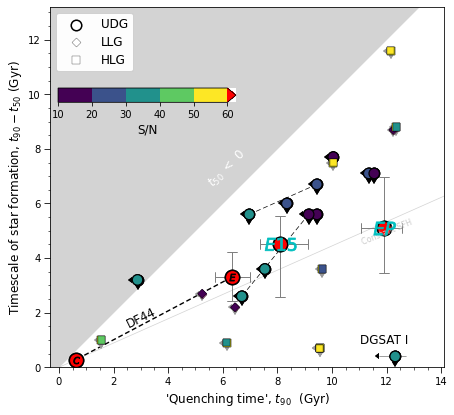

In [20]:
# paper figure 

    
if True: # figure elements
    fig, ax = plt.subplots(1,1,figsize=(fig_width_two*0.5, 0.35*textheight))
    axes_n_cols = [[ ax,col_y ]]
    ax.axis('equal')
    axx=ax
    
    fs = 12
    ax.set_ylabel( label_y, fontsize=fs )
    ax.set_xlabel( label_x, fontsize=fs )
    
    ax.tick_params(direction='out', length=6, which='major')
    ax.tick_params(direction='out', length=2.5, which='minor') 
                    
if True: # legend
    
    handles, labels = [],[]
    
    handles.append( ax.scatter( [],[], fc='w', ec='k', lw=1.5, marker=params_udg['marker'], s=params_udg['s'] ) )
    labels.append( "UDG" )
    handles.append( ax.scatter( [],[], fc='w', ec='0.1', lw=0.3, marker=params_llg['marker'], s=params_llg['s'] ) )
    labels.append( "LLG" )
    handles.append( ax.scatter( [],[], fc='w', ec='0.1', lw=0.3, marker=params_hlg['marker'], s=params_hlg['s'] ) )
    labels.append( "HLG" )

    leg2 = axx.legend( handles, labels, ncol=1, numpoints=1, loc=2, fontsize=12, 
                markerscale=1, handlelength=2.5, labelspacing=0.4, #bbox_to_anchor=[-.01,1.02], 
                handler_map={tuple: HandlerTuple(ndivide=None)})   

    axx.add_artist(leg2) 
    
if True: # literature observations
       
    text_params = dict( xycoords='data', textcoords='data', fontsize=0, zorder=0.12 )
    ebparams3 = dict( color='k', mec='None', mfc='w', fmt=' ', ms=0, marker='.', elinewidth=0.0001, capsize=3., capthick=0, uplims=True, zorder=0 )
    ebparams4 = dict( color='0.5', mec='None', mfc='w', fmt=' ', ms=0, marker='.', elinewidth=0.5, capsize=0, capthick=1, uplims=False, zorder=0 )

    ebparams3.update( dict( xuplims=True, uplims=True ) )
    dict_to_plot_things = dict( col_x=col_x, col_y=col_y, ax=ax, add_err=True )

    selections = [ '(is_UDG == 1.)','(Type == "LLG")','(Type == "HLG")'  ]
    selection_params = [ params_udg, params_llg, params_hlg ]
    for ii,(query_i,params_i) in enumerate(zip( selections, selection_params )):

        err_x0 = [-0.19, -0.1,-0.13][ii]
        dict_to_plot_things.update( dict( x_err=[err_x0,0], y_err=[err_x0,0],  ))
        ebparams3['color'] = ['k','0.6','0.6'][ii]

        df = df_merged.query( '&'.join([query_i,'(is_data == 1.)','(Galaxy != "DF44")']) )
        if len(df)<1: continue                   

        # main
        plot_columns( df, params=params_i, ebparams=ebparams4, **dict_to_plot_things )
        plot_columns( df, params=params_i, ebparams=ebparams3, **dict_to_plot_things )

        params_i.update( dict( c=df[col_c].values ) )                
        params_i.update( params_colors )                
        cb = plot_columns( df, params=params_i, ebparams=ebparams4, **dict_to_plot_things )            
        cb = plot_columns( df, params=params_i, ebparams=ebparams3, **dict_to_plot_things )            

if True: # DF44 
    
    add_annotations( ax, ['DF44'], [(3,1.8)], ha='center', va='center', rotation=26 )
    
    params_df44_base = dict( ax=ax, col_x=col_x, col_y=col_y, col_c=col_c, 
                             params_errorbars=params_df44['errorbars'], 
                             params_points=params_df44['points'],
                           )
    
    plot_df44_source( df=df_webb2022.query('source=="aD1_both"'), 
                      params_marker_label=dict( marker='$E$', s=50,  lw=0.8, color='k', zorder=5 ),
                      **params_df44_base
                    )
    
    plot_df44_source( df=df_webb2022.query('source=="aD02_both"'), 
                      params_marker_label=dict( marker='$C$', s=50,  lw=0.8, color='k', zorder=5 ),
                      **params_df44_base
                    )
    
    # extra
    plot_df44_source( df=df_webb2022.query('source=="aD1_phot"'), 
                      params_marker_label=dict( marker='$EP$', s=500,  lw=0.8, color='c', zorder=5 ),
                      **params_df44_base
                    )
    
    # extra    
    plot_df44_source( df=df_webb2022.query('source=="aD1_both_snr15"'), 
                      params_marker_label=dict( marker='$E15$', s=1000,  lw=0.8, color='c', zorder=5 ),
                      **params_df44_base
                    )
    
if True: #DGATI
    add_annotations( ax, ['DGSAT I'], [(11.9,1)], va='center', ha='center' ) 

if True: # connecting points 
    
    params_connect1a = dict( zorder=-1, lw=0.7, color='k', dashes=(7,4) )
    params_connect1b = dict( zorder=-1, lw=1.4, color='k', dashes=(3.5,2) )
        
    for ll,(ax,col_y) in enumerate(axes_n_cols):

        params_to_connect = dict( cols_x=[col_x], cols_y=[col_y], axes=[[ax]]  )

        draw_connection( df_webb2022.query('source=="aD1_both"'),  df_webb2022.query('source=="aD02_both"'), params_c=params_connect1b, **params_to_connect )
        draw_connection( df_ferremateu2018.query('Yagi == "Yagi93"'),   df_ruizlara2018.query('Yagi == "Yagi93"'), params_c=params_connect1a, **params_to_connect )
        draw_connection( df_ferremateu2018.query('Yagi == "Yagi418"'),  df_ruizlara2018.query('Yagi == "Yagi418"'), params_c=params_connect1a, **params_to_connect )    

if True: # figure tweaks 
        
    ax.set_yticks( yticks )
    ax.set_yticks( np.arange( yticks[0], yticks[-1], 0.5 ), minor=True )
    ax.set_ylim( ylim ) 
    
    ax.set_xticks( xticks )
    ax.set_xticks( np.arange( xticks[0], xticks[-1], 0.5 ), minor=True )
    ax.set_xlim( xlim )
        
if True: # colorbar 
    
    #cax = fig.add_axes([0.64, 0.6, 0.18,0.03])
    cax = fig.add_axes([0.14, 0.68, 0.35,0.03])
    fcb = fig.colorbar( cb, cax=cax, orientation='horizontal', extend='max' )
    fcb.set_label(label=label_c, fontsize=12)    
    
if True: # unphysical region
    
    xx = np.linspace(-1,15,3)
    ax.fill_between( xx, xx, xx+20, color='lightgrey', alpha=1, zorder=-10 )
    testline = '' # '-----------------' # 
    ax.annotate(testline+r'$t_{50}~<~0$'+testline, xy=(0,0), xytext=(0.45,0.55), xycoords='axes fraction', \
                 fontsize=12, color='w', ha='center', va='center', rotation=45 )   
    
    ts = np.linspace(0,13.7+5,100)
    t90s = 0.9*ts
    t50s = 0.5*ts
    ax.plot( t90s, t90s-t50s, color='lightgrey', lw=0.7, zorder=-100, ls='-' )    
    xy = (12,5.5)
    ax.annotate("Constant SFH", xy=xy, xytext=xy, xycoords='data', textcoords='data', ha='center', va='top', \
                rotation=45/2, fontsize=8, color='0.8')
      
plt.savefig( 'figures/figB4.pdf', **saveparams)
plt.show()    